In [1]:
#########################################
##  Import libraries and functions
#########################################
# import numpy as np
# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import linecache
# import sys

#Usage: generate_component_table(input_file)
from darcy_processing import generate_component_table

#Usage: generate_impi_table(fin)
from darcy_processing import generate_impi_table

#Usage: (simtime, walltime, numcells, numranks) = getdata_sim(fin)
from darcy_processing import getdata_sim

#Usage: plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig)
from darcy_processing import plot_1d

#Usage: plot_1d_2scales(xvec, yvec1, yvec2, xrange, yrange1, yrange2, xtitle, ytitle1, ytitle2, outfig)
from darcy_processing import plot_1d_2scales

#Usage: cpuhours = compute_cpuhours(walltime, numranks)
from darcy_processing import compute_cpuhours

In [2]:
###################################
##### PROVIDE INPUTS HERE !!! #####
###################################

# Specify the input file to read
#fin = "./darcy_mpi_inc482d.out"
#fin = "./darcy_irmrand_inc144d.out"
#fin = "./darcy_irmrand_inc151d.out"
# Valid runs
#fin = "./darcy_run1_l16d16_mpi_com400d.out"
fin = "darcy_run2_l16d16_irm2016rand_com400d.out"

# Specify the output figure path & name
fout = '/media/data/emily/Desktop/test_darcy_plot'


In [4]:
generate_component_table(fin)


Component              Exec. time (sec)     Percent (%)
----------------       ----------------     -----------
Total simulation             11545.4289     100.00
Computation                   6391.3961      55.36
Grid refinement               1602.4568      13.88
Conformity check              1318.0039      11.42
Load balancing                1539.4611      13.33
Resource adaptation              4.2483       0.04
Others                         689.8627       5.98



In [5]:
generate_impi_table(fin)


Function               Acc. time (sec)    Percent (%)
----------------       ----------------   -----------
Total adaptation               4.2483     100.00
MPI_init_adapt                 0.0500       1.18
MPI_Comm_probe_adapt           0.2074       4.88
MPI_Comm_adapt_begin           1.4889      35.05
MPI_Comm_adapt_commit          0.0500      46.62



In [6]:
(simtime, walltime, numcells, numranks) = getdata_sim(fin)

cpuhrs = compute_cpuhours(walltime, numranks)
print(cpuhrs)

22.3250138889


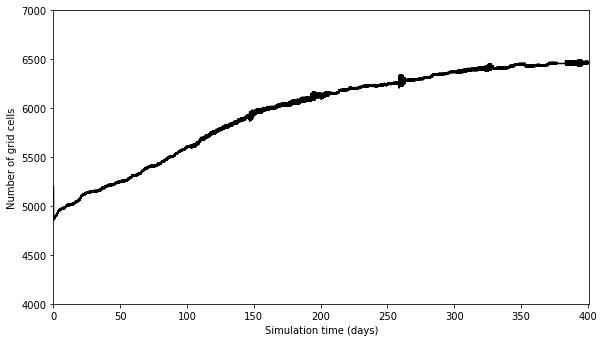

In [7]:
#####
# plot "Cells vs Sim.time (days):
#####
xvec = [x/3600/24 for x in simtime]
yvec = numcells
xrange = [0,401]  #use [0,0] to auto set xlim
yrange = [4000,7000]  #use [0,0] to auto set ylim
xtitle = "Simulation time (days)"
ytitle = "Number of grid cells"
outfig = fout+"/cells_vs_simday.pdf"

plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig)
    

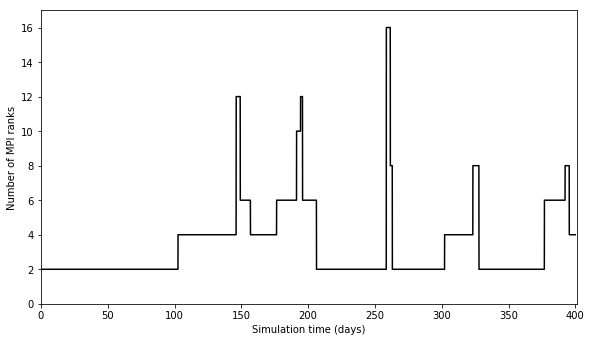

In [8]:
#####
# plot "Ranks vs Sim.time (days):
#####
xvec = [x/3600/24 for x in simtime]
yvec = numranks
xrange = [0,401]  #use [0,0] to auto set xlim
yrange = [0,17]  #use [0,0] to auto set ylim
xtitle = "Simulation time (days)"
ytitle = "Number of MPI ranks"
outfig = fout+"/ranks_vs_simdays.pdf"

plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig)
    

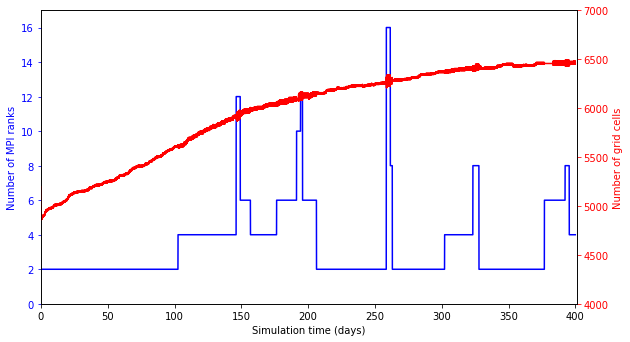

In [12]:
#####
# plot "Ranks|Cells vs Sim.time (days):
#####
xvec = [x/3600/24 for x in simtime]
yvec1 = numranks
yvec2 = numcells
xrange = [0,401]  #use [0,0] to auto set xlim
yrange1 = [0,17]  #use [0,0] to auto set ylim
yrange2 = [4000,7000]  #use [0,0] to auto set ylim
xtitle = "Simulation time (days)"
ytitle1 = "Number of MPI ranks"
ytitle2 = "Number of grid cells"
outfig = fout+"/ranks_cells_vs_simdays.pdf"

plot_1d_2scales(xvec, yvec1, yvec2, xrange, yrange1, yrange2, xtitle, ytitle1, ytitle2, outfig)

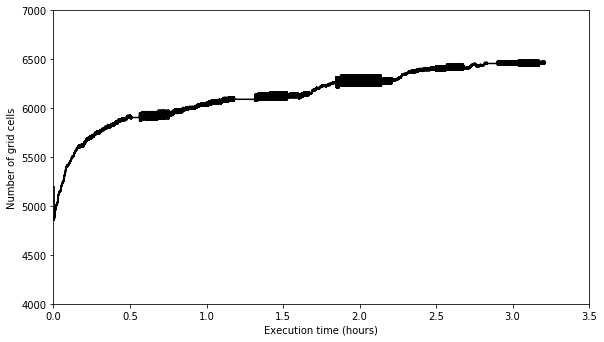

In [9]:
#####
# plot "Cells vs Exec.time (hrs):
#####
xvec = [x/3600 for x in walltime]
yvec = numcells
xrange = [0,3.5]  #use [0,0] to auto set xlim
yrange = [4000,7000]  #use [0,0] to auto set ylim
xtitle = "Execution time (hours)"
ytitle = "Number of grid cells"
outfig = fout+"/cells_vs_wallhrs.pdf"

plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig)
    

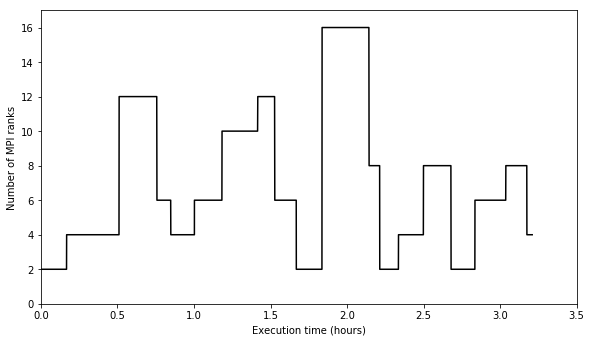

In [10]:
#####
# plot "Ranks vs Exec.time (hrs):
#####
xvec = [x/3600 for x in walltime]
yvec = numranks
xrange = [0,3.5]  #use [0,0] to auto set xlim
yrange = [0,17]  #use [0,0] to auto set ylim
xtitle = "Execution time (hours)"
ytitle = "Number of MPI ranks"
outfig = fout+"/ranks_vs_wallhrs.pdf"

plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig)
    

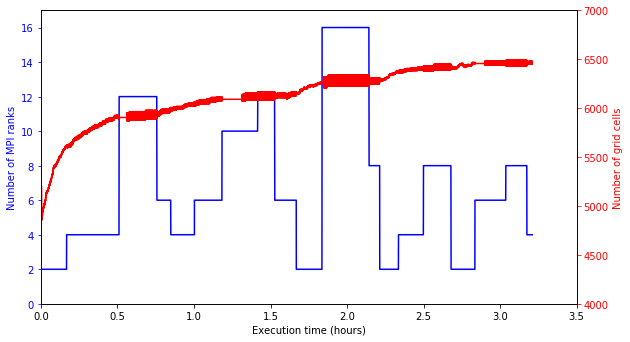

In [11]:
#####
# plot "Ranks|Cells vs Exec.time (hrs):
#####
xvec = [x/3600 for x in walltime]
yvec1 = numranks
yvec2 = numcells
xrange = [0,3.5]  #use [0,0] to auto set xlim
yrange1 = [0,17]  #use [0,0] to auto set ylim
yrange2 = [4000,7000]  #use [0,0] to auto set ylim
xtitle = "Execution time (hours)"
ytitle1 = "Number of MPI ranks"
ytitle2 = "Number of grid cells"
outfig = fout+"/ranks_cells_vs_wallhrs.pdf"

plot_1d_2scales(xvec, yvec1, yvec2, xrange, yrange1, yrange2, xtitle, ytitle1, ytitle2, outfig)